In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Regressão linear
## Método dos Mínimos Quadrados
Gerando dados

$y = 3x_1 + 4 + e$

onde $e$ segue uma distribuição normal

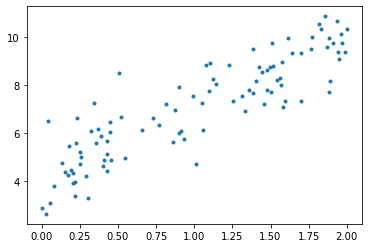

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, '.')

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
theta_best

array([[4.16185523],
       [2.86916745]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b @ theta_best
y_predict

array([[4.16185523],
       [9.90019012]])

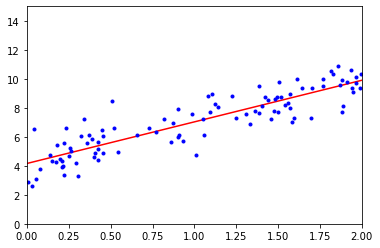

In [6]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.16185523]), array([[2.86916745]]))

## Gradiente Descendente em Lote

In [8]:
eta = 0.1 # taxa de aprendizado
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # inicialização aleatória

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [9]:
theta

array([[4.16185523],
       [2.86916745]])

## Gradiente Descendente Estocástico

In [10]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [11]:
theta

array([[4.20739488],
       [2.87385318]])

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(alpha=.2, eta0=50, learning_rate='optimal', penalty=None)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.2, eta0=50, learning_rate='optimal', penalty=None)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.03212891]), array([2.96149562]))

## Regressão polinomial

In [14]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

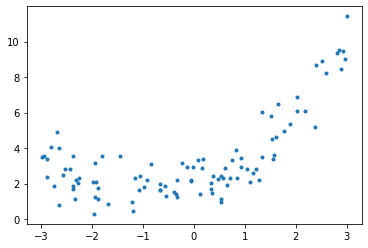

In [15]:
plt.plot(X, y, '.')
axis = plt.axis()

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.64908775])

In [17]:
X_poly[0]

array([-2.64908775,  7.01766592])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.90956654]), array([[0.99432719, 0.52146055]]))

In [19]:
X_model = np.arange(axis[0], axis[1], 0.01).reshape(-1,1)
Y_model = lin_reg.predict(poly_features.transform(X_model))

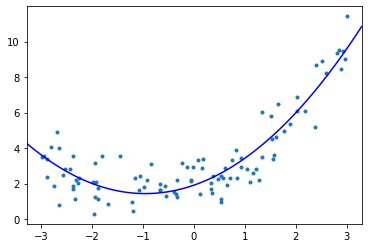

In [20]:
plt.plot(X, y, '.')
axis = plt.axis()
plt.plot(X_model, Y_model, 'b')
plt.axis(axis)
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Tamanho do conjunto de treinamento", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

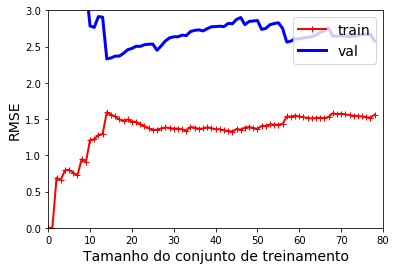

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

In [23]:
from sklearn.model_selection import learning_curve

In [24]:
def plot_improved_learning_curves(model, X, y, scoring="Pontuação"):
    train_sizes_abs, train_scores, val_scores = learning_curve(model, X, y,train_sizes=np.arange(3, X.size//5 * 4))
    plt.fill_between(train_sizes_abs, train_scores.min(1), train_scores.max(1), alpha=.5)
    plt.plot(train_sizes_abs, train_scores.mean(1), label='train')
    plt.fill_between(train_sizes_abs, val_scores.min(1), val_scores.max(1), alpha=.5)
    plt.plot(train_sizes_abs, val_scores.mean(1), label='val')
    plt.title("Curva de aprendizado")
    plt.xlabel("Tamanho da amostra")
    plt.ylabel(scoring)
    plt.legend()
    plt.axis([0, 84, 0, 1])
    plt.show()

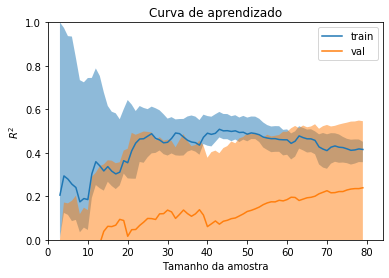

In [25]:
plot_improved_learning_curves(lin_reg, X, y, "$R^2$")

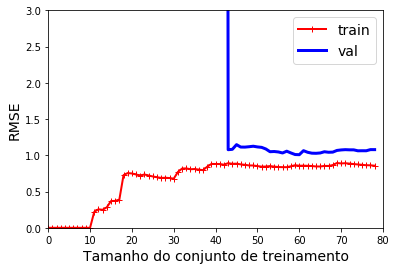

In [26]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

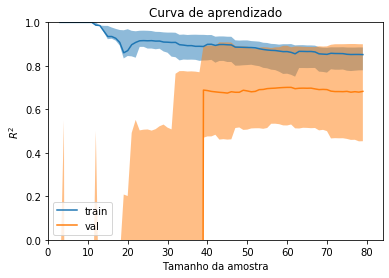

In [27]:
plot_improved_learning_curves(polynomial_regression, X, y, "$R^2$")

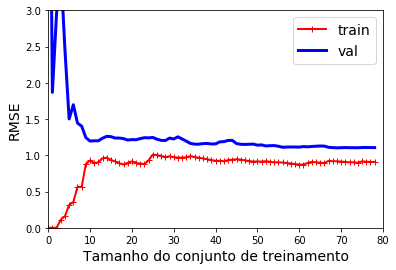

In [35]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

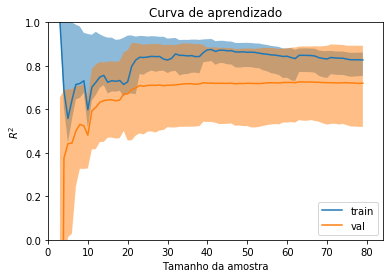

In [29]:
plot_improved_learning_curves(polynomial_regression, X, y, "$R^2$")

## Regulação

In [30]:
from sklearn.linear_model import Ridge
# Esse 'cholesky' só muda o custo computacional
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.74144319]])

In [31]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.71307887])

In [32]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.69083729])

In [33]:
from sklearn.linear_model import ElasticNet
# l1_ratio é a taxa de mixagem
elastic_net = ElasticNet(alpha=.1, l1_ratio=.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.69555909])

In [38]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start: quando chama o fit(), ele continua o treinameto onde foi deixado em vez de recomeçar do início
sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

minimun_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimun_val_error:
        minimun_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [39]:
best_epoch, best_model

(15,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

# Regressão logística

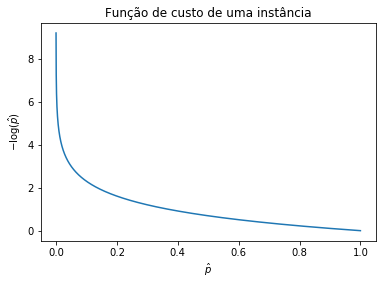

In [44]:
X = np.arange(0, 1, 0.0001)[1:]
y = -np.log(X)
plt.xlabel('$\hat p$')
plt.ylabel('$-\log(\hat p)$')
plt.title('Função de custo de uma instância')
plt.plot(X, y)

In [45]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [46]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [47]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [49]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)

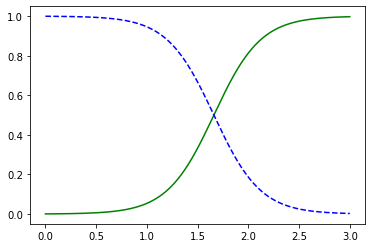

In [51]:
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')

In [52]:
X = iris['data'][:, (2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [53]:
softmax_reg.predict([[5, 2]])

array([2])

In [54]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# Exercicio 12
Implemente o Gradiente Descendente em Lote em parada antecipada para a Regressão Softmax(sem utilizar o Scikit-Learn)

## Softmax
$s_k(x) = \left ( \theta^{(k)} \right )^T \cdot x$

$\hat p_k = \frac{e^{s_k(x)}}{\sum_{j=1}^K e^{s_j(x)}}$

$\triangledown_{\theta^{(k)}} J(\theta) = \frac{1}{m} \sum_{i=1}^m \left ( \hat p_k^{(i)} - y_k^{(i)} \right ) x^{(i)}$